# MNIST 데이터셋 분석 - CNN

In [ ]:
%%time
##############################################################
# 16-2 MNIST : Simple 코드 (20초 소요) - 정확도 98%대
##############################################################
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train.shape, X_test.shape

Wall time: 1min 53s


((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

# One-Hot
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
# MODEL_DIR = './model/'
# if not os.path.exists(MODEL_DIR):
#     os.mkdir(MODEL_DIR)

modelpath="./model/mnist/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 1: val_loss improved from inf to 0.15963, saving model to ./model/mnist\01-0.1596.hdf5

Epoch 2: val_loss improved from 0.15963 to 0.10324, saving model to ./model/mnist\02-0.1032.hdf5

Epoch 3: val_loss improved from 0.10324 to 0.08597, saving model to ./model/mnist\03-0.0860.hdf5

Epoch 4: val_loss improved from 0.08597 to 0.07505, saving model to ./model/mnist\04-0.0751.hdf5

Epoch 5: val_loss improved from 0.07505 to 0.06958, saving model to ./model/mnist\05-0.0696.hdf5

Epoch 6: val_loss improved from 0.06958 to 0.06767, saving model to ./model/mnist\06-0.0677.hdf5

Epoch 7: val_loss improved from 0.06767 to 0.06283, saving model to ./model/mnist\07-0.0628.hdf5

Epoch 8: val_loss did not improve from 0.06283

Epoch 9: val_loss improved from 0.06283 to 0.06060, saving model to ./model/mnist\09-0.0606.hdf5

Epoch 10: val_loss improved from 0.06060 to 0.05729, saving model to ./model/mnist\10-0.0573.hdf5

Epoch 11: val_loss improved from 0.05729 to 0.05701, saving model to ./m

In [ ]:
df_history = pd.DataFrame(history.history)
df_history 

,loss,accuracy,val_loss,val_accuracy
0,0.300159,0.915633,0.159629,0.9547
1,0.124480,0.963883,0.103241,0.9686
2,0.084471,0.975633,0.085974,0.9740
3,0.060255,0.983033,0.075054,0.9764
4,0.045796,0.986350,0.069579,0.9784
5,0.035453,0.990533,0.067670,0.9787
6,0.027944,0.992117,0.062830,0.9804
7,0.020983,0.994917,0.063705,0.9800
8,0.016143,0.996450,0.060603,0.9819
9,0.012657,0.997150,0.057289,0.9829


<AxesSubplot:>

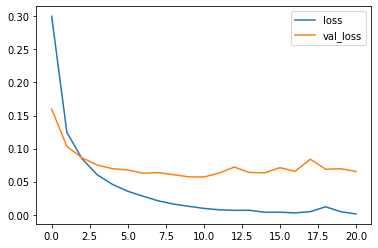

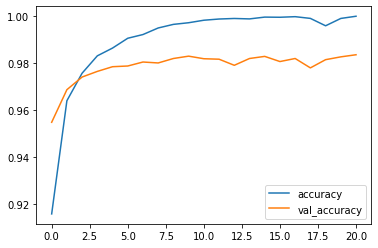

In [ ]:
df_history[['loss', 'val_loss']].plot()
df_history[['accuracy', 'val_accuracy']].plot()

In [ ]:
# twin x로 그려보가

1/1 [==============================] - 2s 2s/step
Y값 = 7
예측값 = 7
###### 정답!!! ######


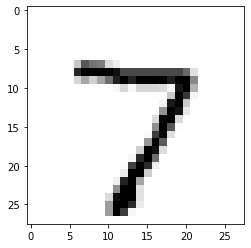

In [ ]:
###############################################################
# 검증하기 : n번째 데이터 검증
###############################################################
n = 0
predicted = model.predict(X_test[n].reshape(-1, 28*28)).argmax()
predicted

print("Y값 =", Y_test[n].argmax())
print("예측값 =", predicted)
if Y_test[n].argmax() == predicted:
    print("###### 정답!!! ######")
else:
    print("@@@ 오답 @@@")
plt.imshow(X_test[n].reshape(28, 28), cmap='Greys' )  
plt.show()


1/1 [==============================] - 0s 195ms/step
@@@ 오답 @@@
Y값 4 != 예측값 9


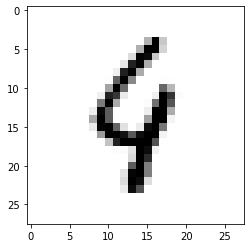

1/1 [==============================] - 0s 274ms/step
@@@ 오답 @@@
Y값 2 != 예측값 9


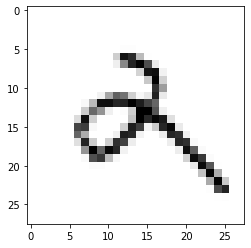

1/1 [==============================] - 0s 276ms/step
@@@ 오답 @@@
Y값 4 != 예측값 2


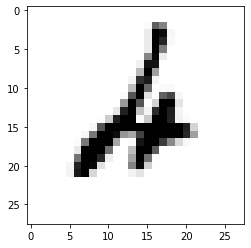

1/1 [==============================] - 0s 296ms/step
@@@ 오답 @@@
Y값 2 != 예측값 7


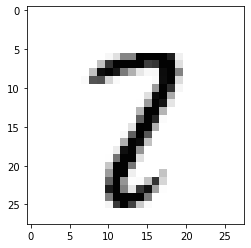

1/1 [==============================] - 0s 357ms/step
@@@ 오답 @@@
Y값 5 != 예측값 3


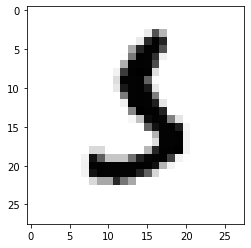

1/1 [==============================] - 0s 324ms/step
@@@ 오답 @@@
Y값 3 != 예측값 7


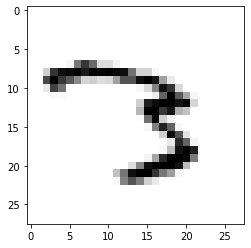

1/1 [==============================] - 0s 186ms/step
@@@ 오답 @@@
Y값 6 != 예측값 0


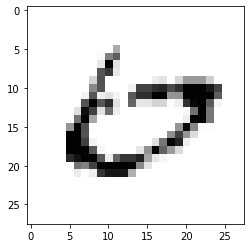

1/1 [==============================] - 1s 639ms/step
@@@ 오답 @@@
Y값 8 != 예측값 2


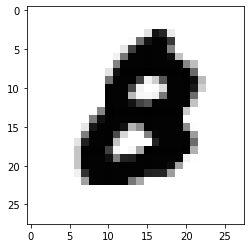

1/1 [==============================] - 0s 315ms/step
@@@ 오답 @@@
Y값 8 != 예측값 2


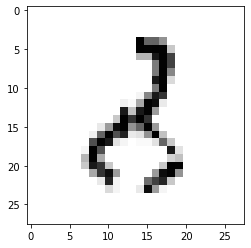

1/1 [==============================] - 0s 223ms/step
@@@ 오답 @@@
Y값 1 != 예측값 8


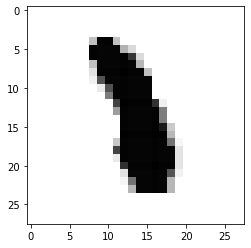

1/1 [==============================] - 0s 191ms/step
@@@ 오답 @@@
Y값 2 != 예측값 1


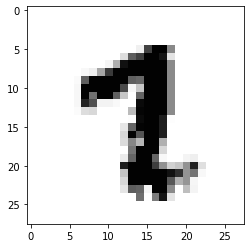

1/1 [==============================] - 0s 251ms/step
@@@ 오답 @@@
Y값 7 != 예측값 3


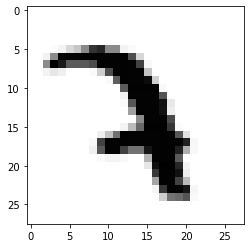

1/1 [==============================] - 0s 249ms/step
@@@ 오답 @@@
Y값 8 != 예측값 4


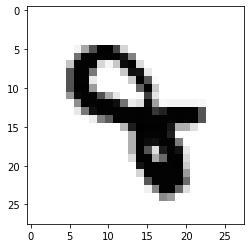

1/1 [==============================] - 1s 732ms/step
@@@ 오답 @@@
Y값 5 != 예측값 8


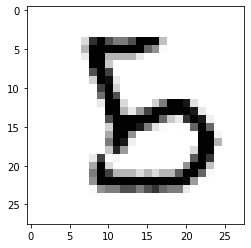

1/1 [==============================] - 0s 188ms/step
@@@ 오답 @@@
Y값 8 != 예측값 9


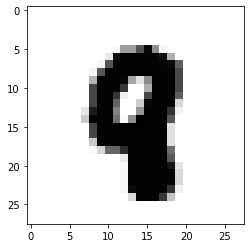

1/1 [==============================] - 0s 304ms/step
@@@ 오답 @@@
Y값 5 != 예측값 4


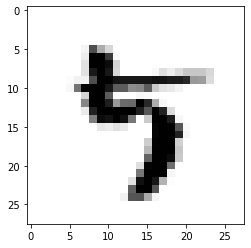

1/1 [==============================] - 0s 259ms/step
@@@ 오답 @@@
Y값 6 != 예측값 0


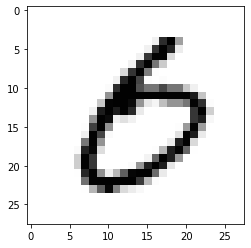

1/1 [==============================] - 0s 398ms/step
@@@ 오답 @@@
Y값 6 != 예측값 5


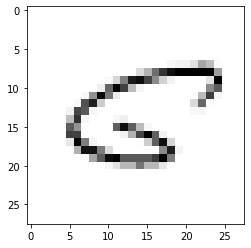

1/1 [==============================] - 0s 459ms/step
@@@ 오답 @@@
Y값 7 != 예측값 2


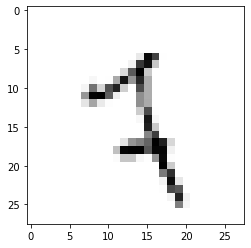

1/1 [==============================] - 0s 249ms/step
@@@ 오답 @@@
Y값 4 != 예측값 6


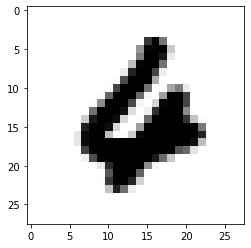

In [ ]:
#############################################################
# Test data 중 오답 print
#############################################################
error_cnt = 0  # 20개만 찾고 중단 (시간 문제)
for i in range(len(X_test)):
    predicted = model.predict(X_test[i].reshape(-1, 28*28)).argmax()
    if Y_test[i].argmax() != predicted:
        error_cnt += 1
        print("@@@ 오답 @@@")
        print(f"Y값 {Y_test[i].argmax()} != 예측값 {predicted}")
        plt.imshow(X_test[i].reshape(28, 28), cmap='Greys' )  
        plt.show()
        if error_cnt >= 20:  # 10개만 찾아 보기
            break


In [ ]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping 

import matplotlib.pyplot as plt
import pandas as pd 
import os 
import tensorflow as tf 

# 데이터 불러오기 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [ ]:
# 컨볼루션 신경망의 설정 
model = Sequential() 
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [ ]:
# 모델 최적화 설정 
modelpath = 'data/model/cnn/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                    epochs=30, batch_size=50, verbose=2,
                    callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력 
print('\n Test Accuracy: %.4f' %(model.evaluate(X_test, Y_test)[1]))

# 그래프 그리기 
pd.DataFrame(history.history).plot()
plt.show()

Epoch 1/30

Epoch 1: val_loss improved from inf to 0.04659, saving model to data/model/cnn\01-0.0466.hdf5
1200/1200 - 408s - loss: 0.2004 - accuracy: 0.9378 - val_loss: 0.0466 - val_accuracy: 0.9846 - 408s/epoch - 340ms/step
Epoch 2/30

Epoch 2: val_loss improved from 0.04659 to 0.03633, saving model to data/model/cnn\02-0.0363.hdf5
1200/1200 - 408s - loss: 0.0801 - accuracy: 0.9765 - val_loss: 0.0363 - val_accuracy: 0.9881 - 408s/epoch - 340ms/step
Epoch 3/30

Epoch 3: val_loss did not improve from 0.03633
1200/1200 - 388s - loss: 0.0610 - accuracy: 0.9815 - val_loss: 0.0364 - val_accuracy: 0.9883 - 388s/epoch - 323ms/step
Epoch 4/30


# Fashion MNIST

In [ ]:
%%time
##############################################################
# Fasheion MNIST 
##############################################################
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

Wall time: 2.88 s


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

# One-Hot
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)
Y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

## Dense

In [ ]:
# 모델 프레임 설정
model1 = Sequential()
model1.add(Dense(512, input_dim=784, activation='relu'))
model1.add(Dense(216, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
# MODEL_DIR = './model/'
# if not os.path.exists(MODEL_DIR):
#     os.mkdir(MODEL_DIR)

modelpath="data/model/fashion_mnist/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model1.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model1.evaluate(X_test, Y_test)[1]))


Epoch 1: val_loss improved from inf to 0.44226, saving model to data/model/fashion_mnist\01-0.4423.hdf5

Epoch 2: val_loss improved from 0.44226 to 0.37843, saving model to data/model/fashion_mnist\02-0.3784.hdf5

Epoch 3: val_loss improved from 0.37843 to 0.35794, saving model to data/model/fashion_mnist\03-0.3579.hdf5

Epoch 4: val_loss did not improve from 0.35794

Epoch 5: val_loss improved from 0.35794 to 0.33492, saving model to data/model/fashion_mnist\05-0.3349.hdf5

Epoch 6: val_loss did not improve from 0.33492

Epoch 7: val_loss did not improve from 0.33492

Epoch 8: val_loss improved from 0.33492 to 0.32082, saving model to data/model/fashion_mnist\08-0.3208.hdf5

Epoch 9: val_loss improved from 0.32082 to 0.30485, saving model to data/model/fashion_mnist\09-0.3049.hdf5

Epoch 10: val_loss did not improve from 0.30485

Epoch 11: val_loss did not improve from 0.30485

Epoch 12: val_loss did not improve from 0.30485

Epoch 13: val_loss did not improve from 0.30485

Epoch 14:

<AxesSubplot:>

<Figure size 720x360 with 0 Axes>

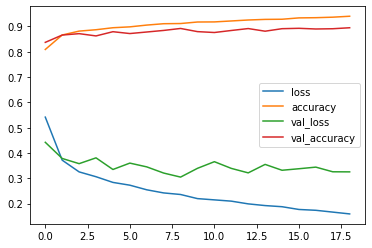

In [ ]:
fig = plt.figure(figsize=(10,5))
df_history = pd.DataFrame(history.history)
df_history.plot()

1/1 [==============================] - 0s 205ms/step
@@@ 오답 @@@
Y값 Shirt != 예측값 T-shirt/top


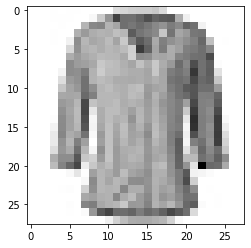

1/1 [==============================] - 0s 129ms/step
@@@ 오답 @@@
Y값 Sneaker != 예측값 Sandal


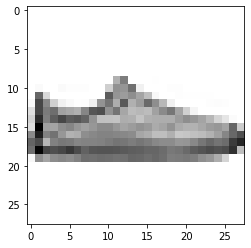

1/1 [==============================] - 0s 144ms/step
@@@ 오답 @@@
Y값 Coat != 예측값 Pullover


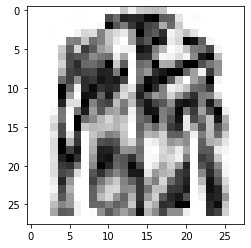

1/1 [==============================] - 0s 149ms/step
@@@ 오답 @@@
Y값 Ankle boot != 예측값 Sandal


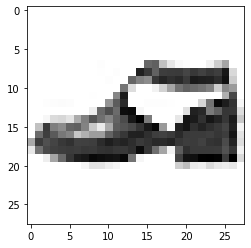

1/1 [==============================] - 0s 158ms/step
@@@ 오답 @@@
Y값 Coat != 예측값 Pullover


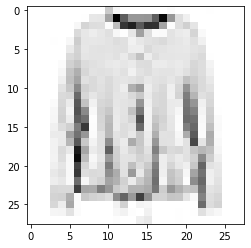

In [ ]:
###############################################################
# 검증하기 : n번째 데이터 검증
###############################################################
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
          'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
error_cnt = 0  # 20개만 찾고 중단 (시간 문제)
for i in range(len(X_test)):
    predicted = model1.predict(X_test[i].reshape(-1, 28*28)).argmax()
    if Y_test[i].argmax() != predicted:
        error_cnt += 1
        print("@@@ 오답 @@@")
        print(f"Y값 {labels[Y_test[i].argmax()]} != 예측값 {labels[predicted]}")
        plt.imshow(X_test[i].reshape(28, 28), cmap='Greys' )  
        plt.show()
        if error_cnt >= 5:  # 5개만 찾아 보기
            break



## CNN

In [ ]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping 

import matplotlib.pyplot as plt
import pandas as pd 
import os 
import tensorflow as tf 

# 데이터 불러오기 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

# 컨볼루션 신경망의 설정 
model2 = Sequential() 
model2.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               1179776   
                                                      

In [ ]:
# 모델 최적화 설정 
modelpath = 'data/model/fashion_mnist/cnn/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history2 = model2.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                      epochs=20, batch_size=100, verbose=2,
                      callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력 
print('\n Test Accuracy: %.4f' %(model2.evaluate(X_test, Y_test)[1]))

# 그래프 그리기 
pd.DataFrame(history2.history).plot()
plt.show()

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.04792, saving model to data/model/fashion_mnist/cnn\01-0.0479.hdf5
600/600 - 251s - loss: 0.2182 - accuracy: 0.9335 - val_loss: 0.0479 - val_accuracy: 0.9834 - 251s/epoch - 419ms/step
Epoch 2/20

Epoch 2: val_loss improved from 0.04792 to 0.03860, saving model to data/model/fashion_mnist/cnn\02-0.0386.hdf5
600/600 - 298s - loss: 0.0773 - accuracy: 0.9759 - val_loss: 0.0386 - val_accuracy: 0.9867 - 298s/epoch - 497ms/step
Epoch 3/20

Epoch 3: val_loss improved from 0.03860 to 0.03368, saving model to data/model/fashion_mnist/cnn\03-0.0337.hdf5
600/600 - 233s - loss: 0.0587 - accuracy: 0.9822 - val_loss: 0.0337 - val_accuracy: 0.9891 - 233s/epoch - 388ms/step
Epoch 4/20

Epoch 4: val_loss improved from 0.03368 to 0.02971, saving model to data/model/fashion_mnist/cnn\04-0.0297.hdf5
600/600 - 232s - loss: 0.0504 - accuracy: 0.9846 - val_loss: 0.0297 - val_accuracy: 0.9907 - 232s/epoch - 387ms/step
Epoch 5/20

Epoch 5: val_loss improved f

KeyboardInterrupt: 